# DailyBeer

In [1]:
import sqlite3
conn = sqlite3.connect("OrderAll.db")

## 1. Monthly  Total Amount Report

In [2]:
from pandas import Series, DataFrame
import pandas as pd

sql_cmd = """
            select month, sum(total) as grandtotal
            from OrderAll
            group by month
            order by month;
"""
cursor = conn.cursor()
cursor.execute(sql_cmd)
tuples = cursor.fetchall()

SR_Gtotal = Series([])


for tuple in tuples:
    SR_Gtotal = SR_Gtotal.set_value(int(tuple[0]), int(tuple[1]))
    print "{:>10}".format(tuple[0]), '월', "{:>12,}".format(tuple[1]),'원'

print SR_Gtotal.values
print SR_Gtotal.index

         7 월    8,474,601 원
         8 월    7,594,394 원
         9 월    6,673,702 원
        10 월    4,974,996 원
[8474601 7594394 6673702 4974996]
Int64Index([7, 8, 9, 10], dtype='int64')


In [3]:
SR_Gtotal

7     8474601
8     7594394
9     6673702
10    4974996
dtype: int64

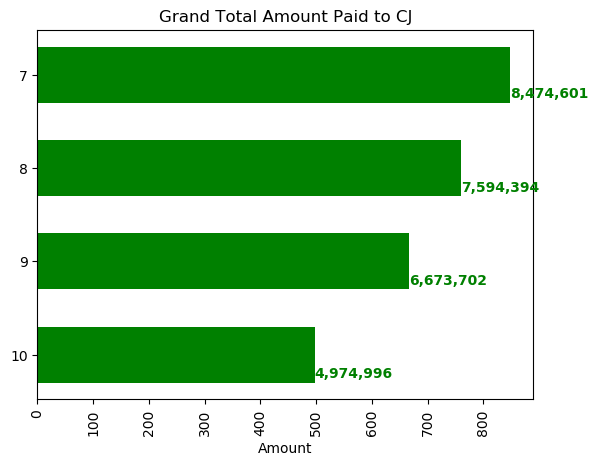

In [3]:
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ind = np.arange(len(SR_Gtotal))
listtotal = SR_Gtotal.values
listindex = SR_Gtotal.index

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = listindex
y_pos = np.arange(len(listindex))
performance = listtotal
error = np.random.rand(len(listindex))

ax.barh(y_pos, performance, 0.6, align='center',
        color='green', ecolor='black')

for i, v in enumerate(listtotal):
    ax.text(v + 3, i + .25, "{:,}".format(v), color='green', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(listindex)
ax.set_xticklabels([0,100,200,300,400,500,600,700,800,900,1000], rotation=90)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel(u'Amount')
ax.set_title('Grand Total Amount Paid to CJ')

plt.show()

## 2. Monthly Products List  

In [5]:

for month_input in listindex:
    
    sql_cmd = """
    select month, sku, pname, sum(total) as gtotal, '원' as won, sum(qty) as qty, '개' as quantity
    from OrderAll
    where month = {} and year = 2017
    group by sku
    order by gtotal desc;
    """.format(month_input)

    cursor = conn.cursor()
    cursor.execute(sql_cmd)
    tuples = cursor.fetchall()

    msum = 0
    linebreak = 0
    for tuple in tuples:
        linebreak += 1
        #pname = tuple[2].replace("\n", "-")
        pname = tuple[2]
        msum += tuple[3]
    
        if (linebreak % 5) == 0:
            print ''
        print tuple[0], '월', tuple[1], pname[:10].ljust(10), '\t', "{:20,}".format(tuple[3]),'원', '\t\t', tuple[5],'개'
       # SR_monthly_product = SR_monthly_product.set_value(pname[:10], tuple[3])
    print "="*64, 'Total Amount', "{:>12,}".format(msum), '원'
    print '\n\n'
    



7 월 424782 염지닭(생활맥주용  	           1,672,440 원 		28 개
7 월 424783 염지닭안심(생활맥주 	             683,100 원 		15 개
7 월 134356 심플로트 냉동감자( 	             602,580 원 		55 개
7 월 144398 심플로트 냉동감자( 	             557,172 원 		54 개

7 월 140440 심플로트 냉동감자( 	             476,036 원 		62 개
7 월 232931 반건오징어(생활맥주 	             354,000 원 		12 개
7 월 201934 소고기육포(생활맥주 	             349,360 원 		80 개
7 월 169394 샐러드믹스(생활맥주 	             345,600 원 		24 개
7 월 163815 이츠웰 골뱅이캔(자 	             344,960 원 		112 개

7 월 176689 소시지(생활맥주용  	             312,455 원 		65 개
7 월 116709 리코스 나쵸칩(45 	             267,960 원 		84 개
7 월 115722 사세통상 버팔로윙( 	             242,550 원 		21 개
7 월 124531 맥앤치즈볼(생활맥주 	             238,920 원 		60 개
7 월 116981 사세통상 버팔로윙스 	             226,380 원 		21 개

7 월 215140 양파드레싱(생활맥주 	             158,400 원 		16 개
7 월 118232 스팸 햄캔(마일드  	             138,600 원 		45 개
7 월 206578 길림양행 땅콩(껍질 	             138,600 원 		18 개
7 월 166412 뫼루니식품 물결무늬 	             115,720 원 		8 개
7 월 127454 파로 할라페뇨(슬라 	             102,850

## 2. Monthly Product Details

## Group by SKU, MONTH

In [4]:
sql_cmd = """
select
        sku, pname,
        month,
        sum(total) as gtotal,
        sum(qty) as qty
from OrderAll
group by sku, month
order by sku, month;
"""
cursor = conn.cursor()
cursor.execute(sql_cmd)
tuples = cursor.fetchall()

In [7]:
prev_sku = None
for tuple in tuples:
    #pname = tuple[1].replace("\n","-")
    pname = tuple[1]
    monthstring = str(tuple[2])+u'월'
    qtystring = str(tuple[4])+u'개' 
    eachmonth = [tuple[0], pname, monthstring, "{:>12,}원".format(tuple[4]), qtystring]
    
    if ( prev_sku != tuple[0]):
        print '='*90
        print ''
    prev_sku = tuple[0]
    print eachmonth[0], (eachmonth[1][:20]).ljust(30),'\t\t', eachmonth[2], '\t\t',eachmonth[3],'\t\t', eachmonth[4]
    
    
    


100353 백설 바삭튀김가루(1Kg/EA) 미국           		8월 		           1원 		1개
100353 백설 바삭튀김가루(1Kg/EA) 미국           		9월 		           5원 		5개

100743 코카콜라 콜라(캔_355ml 355g           		7월 		           4원 		4개
100743 코카콜라 콜라(캔_355ml 355g           		8월 		           4원 		4개
100743 코카콜라 콜라(캔_355ml 355g           		9월 		           2원 		2개
100743 코카콜라 콜라(캔_355ml 355g           		10월 		           2원 		2개

100744 스프라이트 사이다(355ml 355g           		7월 		           5원 		5개
100744 스프라이트 사이다(355ml 355g           		8월 		           5원 		5개
100744 스프라이트 사이다(355ml 355g           		9월 		           4원 		4개
100744 스프라이트 사이다(355ml 355g           		10월 		           3원 		3개

105409 아담스 파마산치즈파우더(1Kg/EA)           		7월 		           2원 		2개
105409 아담스 파마산치즈파우더(1Kg/EA)           		8월 		           1원 		1개

111308 천일식품 새우볶음밥(300g/EA)            		7월 		          13원 		13개
111308 천일식품 새우볶음밥(300g/EA)            		8월 		          10원 		10개
111308 천일식품 새우볶음밥(300g/EA)            		10월 		          10원 		10개

112371 칵테일냅킨(생활맥주용 10000장입  

166413 뫼루니 양념치킨소스(데일리비어용 양념           		7월 		          11원 		11개
166413 뫼루니 양념치킨소스(데일리비어용 양념           		8월 		          14원 		14개

169394 샐러드믹스(생활맥주용 150g*5입            		7월 		          24원 		24개
169394 샐러드믹스(생활맥주용 150g*5입            		8월 		          20원 		20개
169394 샐러드믹스(생활맥주용 150g*5입            		9월 		          13원 		13개
169394 샐러드믹스(생활맥주용 150g*5입            		10월 		          10원 		10개

171838 팔도 비빔면(130g/EA) 40EA           		7월 		           3원 		3개
171838 팔도 비빔면(130g/EA) 40EA           		8월 		           2원 		2개
171838 팔도 비빔면(130g/EA) 40EA           		9월 		           3원 		3개
171838 팔도 비빔면(130g/EA) 40EA           		10월 		           1원 		1개

176689 소시지(생활맥주용 천연돈장_70g*4           		7월 		          65원 		65개
176689 소시지(생활맥주용 천연돈장_70g*4           		8월 		         102원 		102개
176689 소시지(생활맥주용 천연돈장_70g*4           		9월 		          82원 		82개
176689 소시지(생활맥주용 천연돈장_70g*4           		10월 		          45원 		45개

177050 기름여과지(생활맥주용 100매 BOX           		10월 		           1원 		1개

177058 미니고무장갑(생활맥주용 

##  3. Make the SQL Result as the DataFrame Directly

In [5]:
sql_cmd = """
select
        sku, pname,
        month,
        sum(total) as gtotal
from OrderAll
group by sku, month
order by sku, month;
"""
SQL_Result_DF1 = pd.read_sql_query(sql_cmd, conn)

In [30]:
SQL_Result_DF1

,sku,pname,month,gtotal
0,100353,백설 바삭튀김가루(1Kg/EA) 미국-※미국산,8,2750
1,100353,백설 바삭튀김가루(1Kg/EA) 미국-※미국산,9,13750
2,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,7,68112
3,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,8,68112
4,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,9,34056
5,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,10,34056
6,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,7,76955
7,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,8,76955
8,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,9,61564
9,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,10,46173


In [7]:
SQL_Result_DF1.columns

Index([u'sku', u'pname', u'month', u'gtotal'], dtype='object')

In [6]:
SQL_Result_DF1.set_index(['sku','pname', 'month'])


gtotal
sku    pname                                     month         
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                 8         2750
                                                 9        13750
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산 7        68112
                                                 8        68112
                                                 9        34056
                                                 10       34056
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산 7        76955
                                                 8        76955
                                                 9        61564
                                                 10       46173
105409 아담스 파마산치즈파우더(1Kg/EA)                      7        24200
                                                 8        12100
111308 천일식품 새우볶음밥(300g/EA)                       7        23309
                                                 8        17930
                                                 10       17930
112371 칵테일냅킨(생활맥주용 10000장입 BOX) 1EA/BOX          7        33000
                                                 8        33000
                                                 10       33000
115364 삼진 살사소스(2Kg/EA)                           7        39600
                                                 8        59400
                                                 9        19800
                                                 10       59400
115722 사세통상 버팔로윙(1Kg/EA) 태국-※닭고기(태국산)            7       242550
                                                 8       127050
                                                 9       173250
                                                 10      127050
116709 리코스 나쵸칩(454g/EA) 미국-※미국                   7       267960
                                                 8       210540
                                                 9       191400
                                                 10      111650
...                                                         ...
424782 염지닭(생활맥주용 9호_9각 850g/EA) 10EA/BOX         9      1254330
                                                 10     1015410
424783 염지닭안심(생활맥주용 1Kg/EA) 5EA/BOX               7       683100
                                                 8       364320
                                                 9       455400
                                                 10      318780
500556 일회용기세트(1호_70*30mm_100입 다용도 PAC)           8         2386
                                                 9         7158
                                                 10        4772
501191 하이코리아 락스(2L EA)                           7        12316
501326 스파크 세탁세제(5kg EA)                          8        12617
                                                 9        12617
501386 트레펑(1L 막힌하수구용 EA)                         7        24365
                                                 8        48730
                                                 9        48730
503517 스카치브라이트 양면스폰지수세미(EA)                      7         4813
512186 이츠웰 롤백(소_25*35cm_500입 EA)                 7         5390
                                                 8         8085
512188 이츠웰 롤백(중_30*40cm_500입 EA)                 7         7700
512237 이츠웰 페이퍼타올(핸드타올_4500매 BOX) 1EA/BOX         9        21450
514151 이츠웰 다용도봉투(파란색_30L_48*64cm_100매 EA)        7         9900
514158 이츠웰 주방세제(그린알로_3kg EA)                     9         6232
                                                 10        3116
514663 지원 일회용기뚜껑(W-3_75mm_100입 EA)               8         2024
                                                 9         4048
514664 지원 일회용기(W-3_75*65mm_100입 EA)              9        13726
526116 유산지(생활맥주용 1000개 EA)                       7        66000
                                                 8        33000
                                                 9        66000
526117 비닐백(생활맥주용 100매 EA)                        7        39600

[193 rows x 1 columns]

In [7]:
SQL_Result_DF1.set_index(['sku', 'pname', 'month'])[:15].unstack(level=-1)

gtotal                    \
month                                                  7        8        9    
sku    pname                                                                  
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                      NaN   2750.0  13750.0   
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산  68112.0  68112.0  34056.0   
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산  76955.0  76955.0  61564.0   
105409 아담스 파마산치즈파우더(1Kg/EA)                       24200.0  12100.0      NaN   
111308 천일식품 새우볶음밥(300g/EA)                        23309.0  17930.0      NaN   

                                                           
month                                                  10  
sku    pname                                               
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                      NaN  
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산  34056.0  
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산  46173.0  
105409 아담스 파마산치즈파우더(1Kg/EA)                           NaN  
111308 천일식품 새우볶음밥(300g/EA)                        17930.0

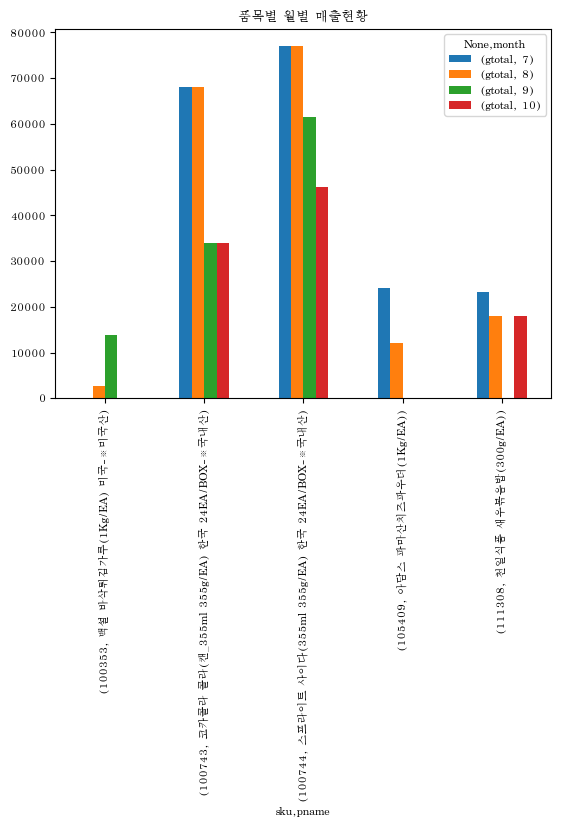

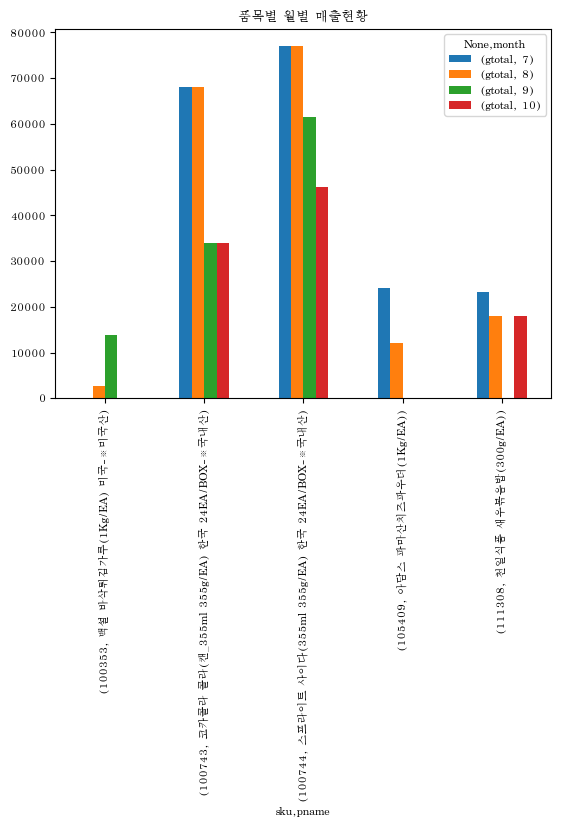

In [11]:
SQL_Result_DF1.set_index(['sku', 'pname', 'month'])[:15].unstack(level=-1).plot(kind='bar', stacked=False)
plt.rcParams["font.family"] = 'AppleMyungjo'
plt.rcParams['font.size'] = 8
plt.title(u'품목별 월별 매출현황' )
plt.show()

# Test Section

## Font in Plot 

In [44]:
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

In [45]:
matplotlib.matplotlib_fname()

u'/Users/kylelee/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

### Truncate unicode string with Unicode utf-8 

In [26]:
print tuple[1]
def unicode_truncate(s, length, encoding='utf-8'):
    encoded = s.encode(encoding)[:length]
    return encoded.decode(encoding, 'ignore')
print unicode_truncate(tuple[1], 60)

백설 바삭튀김가루(1Kg/EA) 미국
※미국산
백설 바삭튀김가루(1Kg/EA) 미국
※미국산


### tuple insertion

In [5]:
 t1 = ( (1, 'p100', 'JUL', 20), (1, 'p100', 'AUG', 30),
        (2, 'p200', 'JUL', 10), (2, 'p200', 'AUG', 40), (2, 'p200', 'SEP', 50),
        (3, 'p300', 'JUL', 40),
        (4, 'p400', 'JUL', 10), (4, 'p400', 'AUG', 20), (4, 'p400', 'SEP', 40), (4, 'p400', 'OCT', 60)
      )

In [6]:
t1

((1, 'p100', 'JUL', 20),
 (1, 'p100', 'AUG', 30),
 (2, 'p200', 'JUL', 10),
 (2, 'p200', 'AUG', 40),
 (2, 'p200', 'SEP', 50),
 (3, 'p300', 'JUL', 40),
 (4, 'p400', 'JUL', 10),
 (4, 'p400', 'AUG', 20),
 (4, 'p400', 'SEP', 40),
 (4, 'p400', 'OCT', 60))

### DataFrame from dictionary

In [11]:
from pandas import Series, DataFrame
import numpy as np


dict1 = {'JUL':[10,20,30,40],
         'AUG':[11,21,31,41],
         'SEP':[12,22,32,42],
         'OCT':[13,23,33,43]
        }
df1 = DataFrame(dict1, columns=['JUL', 'AUG', 'SEP', 'OCT'], index=['p1','p2', 'p3','p4'])
df1

,JUL,AUG,SEP,OCT
p1,10,11,12,13
p2,20,21,22,23
p3,30,31,32,33
p4,40,41,42,43


### new row insertion with dict form into DataFrame 

In [12]:
df1.loc['p4'] = {'JUL':14, 'AUG':24, 'SEP':34, 'OCT':44}
df1

,JUL,AUG,SEP,OCT
p1,10,11,12,13
p2,20,21,22,23
p3,30,31,32,33
p4,14,24,34,44


In [13]:
df1.loc['p5'] = [50, 51, 52, 53]
df1

,JUL,AUG,SEP,OCT
p1,10,11,12,13
p2,20,21,22,23
p3,30,31,32,33
p4,14,24,34,44
p5,50,51,52,53


###  Test Unstack

In [14]:
df1.unstack(level=0)

JUL  p1    10
     p2    20
     p3    30
     p4    14
     p5    50
AUG  p1    11
     p2    21
     p3    31
     p4    24
     p5    51
SEP  p1    12
     p2    22
     p3    32
     p4    34
     p5    52
OCT  p1    13
     p2    23
     p3    33
     p4    44
     p5    53
dtype: int64

In [17]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s1 = Series(np.arange(1.0, 5.0), index=index)


In [18]:
s1

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [34]:
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


###  DataFrame with unstackI()

In [19]:
dfmi = DataFrame(dict1, columns=['JUL', 'AUG', 'SEP', 'OCT'], index=index)
dfmi

JUL  AUG  SEP  OCT
one a   10   11   12   13
    b   20   21   22   23
two a   30   31   32   33
    b   40   41   42   43

In [20]:
dfmi.unstack(level=-1)

JUL     AUG     SEP     OCT    
      a   b   a   b   a   b   a   b
one  10  20  11  21  12  22  13  23
two  30  40  31  41  32  42  33  43

In [37]:
dfmi.unstack(level=0)

JUL     AUG     SEP     OCT    
  one two one two one two one two
a  10  30  11  31  12  32  13  33
b  20  40  21  41  22  42  23  43

In [21]:
dfmi.unstack(level=0).plot(kind='bar', stacked=True)

In [40]:
dfmi.unstack(level=-2)

JUL     AUG     SEP     OCT    
  one two one two one two one two
a  10  30  11  31  12  32  13  33
b  20  40  21  41  22  42  23  43

### Condition check of tuples and Make a dict from tuple elements

In [10]:
t1

((1, 'p100', 'JUL', 20),
 (1, 'p100', 'AUG', 30),
 (2, 'p200', 'JUL', 10),
 (2, 'p200', 'AUG', 40),
 (2, 'p200', 'SEP', 50),
 (3, 'p300', 'JUL', 40),
 (4, 'p400', 'JUL', 10),
 (4, 'p400', 'AUG', 20),
 (4, 'p400', 'SEP', 40),
 (4, 'p400', 'OCT', 60))

In [17]:
colarray = ['JUL', 'AUG', 'SEP', 'OCT']

prev = None
new_d = {'JUL':None, 'AUG':None, 'SEP':None, 'OCT':None}
dfdic = DataFrame(None, columns=colarray)
for t in t1:    
    if prev != t[0] and prev != None:
        print new_d
        dfdic.loc[t[1]] = new_d
        new_d = {'JUL':None, 'AUG':None, 'SEP':None, 'OCT':None}
        
    new_d[t[2]]= t[3]
    prev = t[0]
print new_d

{'OCT': None, 'AUG': 30, 'JUL': 20, 'SEP': None}
{'OCT': None, 'AUG': 40, 'JUL': 10, 'SEP': 50}
{'OCT': None, 'AUG': None, 'JUL': 40, 'SEP': None}
{'OCT': 60, 'AUG': 20, 'JUL': 10, 'SEP': 40}


In [18]:
dfdic

,JUL,AUG,SEP,OCT
p200,20.0,30.0,NaN,NaN
p300,10.0,40.0,50.0,NaN
p400,40.0,NaN,NaN,NaN


In [36]:
df1.loc['p100'] = [None, None, None, None]
df1.loc['p100']['JUL'] = 299

df1


,JUL,AUG,SEP,OCT
p1,10,11,12,13
p2,20,21,22,23
p3,30,31,32,33
p4,14,24,34,44
p100,299,None,None,None


### SQL result to DataFrame in SQLite3

In [8]:
myFrame = pd.read_sql_query(sql_cmd, conn)

In [9]:
myFrame

,sku,pname,month,gtotal,qty
0,100353,백설 바삭튀김가루(1Kg/EA) 미국-※미국산,8,2750,1
1,100353,백설 바삭튀김가루(1Kg/EA) 미국-※미국산,9,13750,5
2,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,7,68112,4
3,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,8,68112,4
4,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,9,34056,2
5,100743,코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산,10,34056,2
6,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,7,76955,5
7,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,8,76955,5
8,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,9,61564,4
9,100744,스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산,10,46173,3


In [10]:
myFrame_T = myFrame.set_index(['sku','pname','month'])

In [11]:
myFrame_T

gtotal  qty
sku    pname                                     month              
100353 백설 바삭튀김가루(1Kg/EA) 미국-※미국산                 8         2750    1
                                                 9        13750    5
100743 코카콜라 콜라(캔_355ml 355g/EA) 한국 24EA/BOX-※국내산 7        68112    4
                                                 8        68112    4
                                                 9        34056    2
                                                 10       34056    2
100744 스프라이트 사이다(355ml 355g/EA) 한국 24EA/BOX-※국내산 7        76955    5
                                                 8        76955    5
                                                 9        61564    4
                                                 10       46173    3
105409 아담스 파마산치즈파우더(1Kg/EA)                      7        24200    2
                                                 8        12100    1
111308 천일식품 새우볶음밥(300g/EA)                       7        23309   13
                                                 8        17930   10
                                                 10       17930   10
112371 칵테일냅킨(생활맥주용 10000장입 BOX) 1EA/BOX          7        33000    1
                                                 8        33000    1
                                                 10       33000    1
115364 삼진 살사소스(2Kg/EA)                           7        39600    4
                                                 8        59400    6
                                                 9        19800    2
                                                 10       59400    6
115722 사세통상 버팔로윙(1Kg/EA) 태국-※닭고기(태국산)            7       242550   21
                                                 8       127050   11
                                                 9       173250   15
                                                 10      127050   11
116709 리코스 나쵸칩(454g/EA) 미국-※미국                   7       267960   84
                                                 8       210540   66
                                                 9       191400   60
                                                 10      111650   35
...                                                         ...  ...
424782 염지닭(생활맥주용 9호_9각 850g/EA) 10EA/BOX         9      1254330   21
                                                 10     1015410   17
424783 염지닭안심(생활맥주용 1Kg/EA) 5EA/BOX               7       683100   15
                                                 8       364320    8
                                                 9       455400   10
                                                 10      318780    7
500556 일회용기세트(1호_70*30mm_100입 다용도 PAC)           8         2386    1
                                                 9         7158    3
                                                 10        4772    2
501191 하이코리아 락스(2L EA)                           7        12316   12
501326 스파크 세탁세제(5kg EA)                          8        12617    1
                                                 9        12617    1
501386 트레펑(1L 막힌하수구용 EA)                         7        24365   10
                                                 8        48730   20
                                                 9        48730   20
503517 스카치브라이트 양면스폰지수세미(EA)                      7         4813    5
512186 이츠웰 롤백(소_25*35cm_500입 EA)                 7         5390    2
                                                 8         8085    3
512188 이츠웰 롤백(중_30*40cm_500입 EA)                 7         7700    2
512237 이츠웰 페이퍼타올(핸드타올_4500매 BOX) 1EA/BOX         9        21450    1
514151 이츠웰 다용도봉투(파란색_30L_48*64cm_100매 EA)        7         9900    3
514158 이츠웰 주방세제(그린알로_3kg EA)                     9         6232    2
                                                 10        3116    1
514663 지원 일회용기뚜껑(W-3_75mm_100입 EA)               8         2024    1
                                                 9         4048    2
514664 지원 일회용기(W-3_75*65mm_100입 EA)              9     

In [19]:
myFrame_T.loc[u'백설 바삭튀김가루(1Kg/EA) 미국-※미국산']

,sku,month,mon,gtotal,qty,quantity
pname,,,,,,
백설 바삭튀김가루(1Kg/EA) 미국-※미국산,100353,8,월,2750,1,개
백설 바삭튀김가루(1Kg/EA) 미국-※미국산,100353,9,월,13750,5,개


In [24]:
myFrame_T[myFrame_T['sku'] == '100353']

,sku,month,mon,gtotal,qty,quantity
pname,,,,,,
백설 바삭튀김가루(1Kg/EA) 미국-※미국산,100353,8,월,2750,1,개
백설 바삭튀김가루(1Kg/EA) 미국-※미국산,100353,9,월,13750,5,개
